<a href="https://colab.research.google.com/github/SeanAntosiak/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
!pip install pandas==0.23.4
#dir(random)  # Reminding ourselves what we can do here

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=256.2154521163626, mobile=False), User(purchased=False, time_on_site=165.43845430347375, mobile=True), User(purchased=False, time_on_site=264.48343929066044, mobile=False), User(purchased=True, time_on_site=124.7489624657181, mobile=True), User(purchased=False, time_on_site=124.89383571632564, mobile=True), User(purchased=True, time_on_site=57.39634436968345, mobile=True), User(purchased=False, time_on_site=123.05640793621878, mobile=True), User(purchased=True, time_on_site=11.414010285595403, mobile=True), User(purchased=False, time_on_site=73.06759361964319, mobile=False), User(purchased=False, time_on_site=133.18965991179653, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,256.215452,False
1,False,165.438454,True
2,False,264.483439,False
3,True,124.748962,True
4,False,124.893836,True


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.732174591776499,5.799126216126974,7.83763023458347,8.00274025108233,8.644881144336983,9.683476703706509,9.703275024626132,10.001956706290846,10.301490049852891,10.414557283158118,10.681213004966153,11.169150881382404,11.169543882286149,11.414010285595403,11.728569632743941,11.75503325771411,13.815179566253542,13.897449751989395,14.072190472657057,14.167093375788124,14.814806996782876,15.195136156899087,15.9791357100356,16.402352046406243,16.841980179870674,16.90896271670314,17.184053112534972,17.795913600378782,17.894173160613615,18.07599694141523,18.305137003329715,18.73706995635485,18.984654806743805,19.348095545188485,19.425335115623174,19.54913661150946,19.554336710709975,19.694209662780455,20.131446159019895,20.831010750342237,...,511.0781304267795,511.28826629068135,516.0047576220031,517.0825645260362,518.3772009322299,521.9801621738552,528.1796615477455,531.1907993797759,531.877993894142,532.0227510353164,533.0217747512603,536.7196718991171,536.7298043132073,537.9768127924713,538.1311359500755,540.08125923111,543.3771604263574,544.7009948834086,546.5818227821707,548.6973662615085,549.3887741325458,549.6294716425041,553.71524137553,553.7374011648081,554.4648649606996,554.9931717736597,557.0577620315004,561.7529120831713,561.7771211002282,561.9430981306806,564.1965173218373,564.6788268254855,569.3294149154258,570.7116252607105,574.2558616065716,583.830668747226,588.7287889850925,589.1815916972098,595.4760360243879,596.8433355550842
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1
True,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(5.141, 123.954]","(123.954, 242.177]","(242.177, 360.399]","(360.399, 478.621]","(478.621, 596.843]"
purchased,,,,,
False,245,217,120,34,28
True,92,129,92,20,23


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(5.141, 123.954]","(123.954, 242.177]","(242.177, 360.399]","(360.399, 478.621]","(478.621, 596.843]"
purchased,,,,,
False,0.727003,0.627168,0.566038,0.62963,0.54902
True,0.272997,0.372832,0.433962,0.37037,0.45098


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.7,0.625333
True,0.3,0.374667


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/SeanAntosiak/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
personsDF=df1.drop(columns = 'Unnamed: 0')
personsDF.head()


,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [0]:
weightBins = pd.cut(personsDF['weight'], 4)
timeBins = pd.cut(personsDF['exercise_time'], 10)
ageBins = pd.cut(personsDF['age'], 5)



In [0]:
firstCT = pd.crosstab(weightBins,timeBins)
firstCT

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
weight,,,,,,,,,,
"(99.854, 136.5]",32,30,42,40,38,44,45,51,62,70
"(136.5, 173.0]",32,34,60,46,33,51,36,46,38,21
"(173.0, 209.5]",45,39,45,54,33,23,13,1,0,0
"(209.5, 246.0]",40,26,17,12,1,0,0,0,0,0


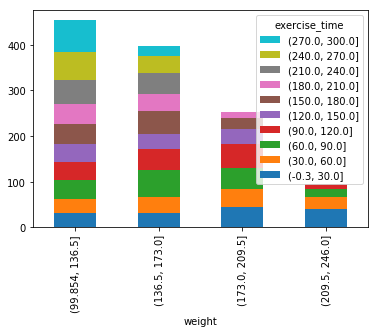

In [0]:
firstCT.plot(kind='bar', stacked=True, legend = 'reverse');


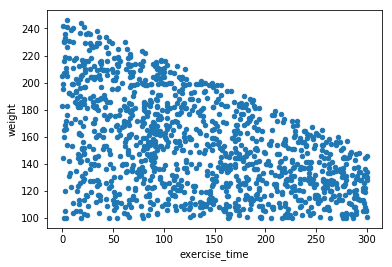

In [0]:
personsDF.plot.scatter(x='exercise_time', y='weight');

From both graphs there is a pretty clear that inverse relationship between exercise time and weight across all ages. 

Regardless of age, nobody who exercised for 300 units-of-time weighs more than 160lbs, and nobody who exercised more than 150 units-of-time  weighs more than 200lbs.

In [0]:
secondCT = pd.crosstab(ageBins,weightBins)
secondCT

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
age,,,,
"(17.938, 30.4]",97,101,43,15
"(30.4, 42.8]",116,74,50,13
"(42.8, 55.2]",96,71,39,17
"(55.2, 67.6]",75,71,57,19
"(67.6, 80.0]",70,80,64,32


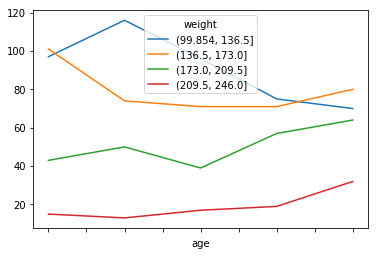

In [0]:
secondCT.plot();

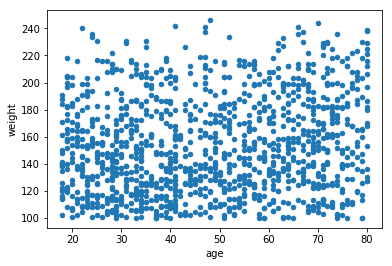

In [132]:
personsDF.plot.scatter(x='age', y='weight');

I can not tell much from the scatter plot, but from the line graph I can see that the number of people above 209lbs increases constantly after a certain age(third tick mark), while the number of people under 136lbs constantly decreases after that tick mark. 

In [0]:
thirdCT = pd.crosstab(timeBins,ageBins)
thirdCT

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 30.0]",21,24,21,31,52
"(30.0, 60.0]",31,28,20,15,35
"(60.0, 90.0]",24,22,23,38,57
"(90.0, 120.0]",22,33,19,33,45
"(120.0, 150.0]",23,16,20,17,29
"(150.0, 180.0]",31,26,19,23,19
"(180.0, 210.0]",27,22,17,20,8
"(210.0, 240.0]",34,25,17,21,1
"(240.0, 270.0]",26,29,33,12,0


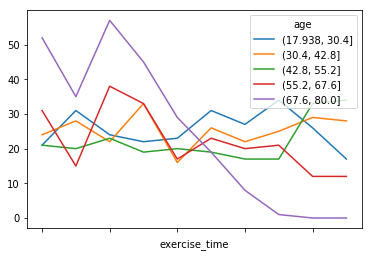

In [130]:
thirdCT.plot();

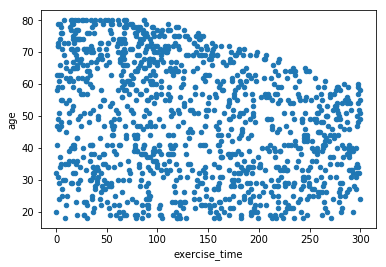

In [128]:
personsDF.plot.scatter(x='exercise_time', y='age');

From the scatter plot we can see that older people tend to exercise for less time. This can be seen in the  purple line of the line graph,  more people in this age range tend to exersice less than at people in other age ranges.

In [139]:
pt = pd.pivot_table(personsDF, values=['exercise_time','age'], index=weightBins)
pt

,age,exercise_time
weight,,
"(99.854, 136.5]",46.341410,171.931718
"(136.5, 173.0]",47.420655,144.206549
"(173.0, 209.5]",51.276680,88.296443
"(209.5, 246.0]",54.562500,44.239583


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. All variables (age, weight, exersise time) are continuous and ordinal

2. It looks like "age vs weight" is coralated while "exercise time vs age" and "weight vs exercise time" are  inversly coralated.

3. Because the relationship between weight and exercise apears to be stronger than that of age and weight. I would assume that the relationship between age and weight is caused by older people tending to exercise less, and that weight is not directly effected by age itself.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)